In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
class multi_armed_bandits():
    def __init__(self, n_arm=0, initial_estimate=0, stationary=False, mean=0, std=0.01, sample_average=False, UCB=False, c=0, keep_constant=False):
        self.n_arm = n_arm
        self.initial_estimate = initial_estimate 
        if(keep_constant==True):
            self.actual_reward = np.zeros(self.n_arm) + np.random.normal(0, 1) * np.ones(self.n_arm)
        else:
            self.actual_reward = np.random.normal(0, 1, n_arm) #
        self.estimated_reward = np.zeros(self.n_arm) + self.initial_estimate * np.ones(self.n_arm)
        self.actions = np.arange(self.n_arm)
        self.count_per_action = np.zeros(self.n_arm)
        self.mean = mean
        self.std = std
        self.sample_average = sample_average
        self.stationary = stationary
        self.UCB = UCB
        self.c = c

    def optimal_action_chosen(self, chosen_action_value):
        max_action_value = 0
        for i in range(len(self.actual_reward)):
            if(self.actual_reward[i]>max_action_value):
                max_action_value = self.actual_reward[i]
        if(chosen_action_value == max_action_value):
            return True
        else:
            return False

    def choose_action(self, eps, time_step=0):
        self.action_index = 0
        import random
        prob = random.random()
        if(prob<eps):
            self.action_index = np.random.choice(self.actions)
        else:
            if(self.UCB==False):
                self.action_index = np.argmax(self.estimated_reward)
            else:
                self.action_index = np.argmax(self.estimated_reward + self.c*np.sqrt(np.log(time_step) / (self.count_per_action + 0.01)))
        return self.action_index

    def update_step(self, action_index):
        self.count_per_action[action_index] += 1

        reward = np.random.normal(self.actual_reward[action_index], 1)

        is_optimal_action = self.optimal_action_chosen(self.actual_reward[action_index])

        if(self.sample_average==False):
            step_size = 0.1
            self.estimated_reward[action_index] += step_size*(reward - self.estimated_reward[action_index])
        else:
            self.estimated_reward[action_index] += (1.0/self.count_per_action[action_index])*(reward - self.estimated_reward[action_index])			

        if(self.stationary==False):
            self.actual_reward = np.asarray(list(map(lambda x: x + np.random.normal(self.mean, self.std), self.actual_reward)))
        return reward, is_optimal_action

In [6]:
def bandit_simulation(runs, steps, ep=0.1, stat=False, sample_avg=False, init_estimate=0, U=0, c_factor=0, keep_const=False):
    avg_reward = np.zeros((runs, steps))
    percentage_optimal_action = np.zeros((runs, steps), dtype=float)
    for r in range(runs):
        ten_armed_bandit = multi_armed_bandits(n_arm=10, initial_estimate=init_estimate, stationary=stat, sample_average=sample_avg, UCB=U, c=c_factor, keep_constant=keep_const)
        for s in range(1, steps+1):
            action_chosen = ten_armed_bandit.choose_action(eps=ep, time_step=s)
            reward, optimal_action = ten_armed_bandit.update_step(action_chosen)
            if(optimal_action==True):
                optimal_action_count = 1
            else:
                optimal_action_count = 0
            avg_reward[r, s-1] = reward
            percentage_optimal_action[r, s-1] = optimal_action_count * 100.

    return avg_reward, percentage_optimal_action

In [7]:
def plot(avg_reward, name):
    mean_reward = np.mean(avg_reward, axis=0)
    time_step = np.arange(steps)
    plt.plot(time_step, mean_reward)
    plt.xlim(1,steps+1)
    plt.ylim(0, 2.0)
    plt.xlabel('Time Step')
    plt.ylabel('Average Reward')
    plt.show();
    plt.close();

In [8]:
def plot_optimal_percentage(avg_reward, name):
    mean_reward = np.mean(avg_reward, axis=0)
    time_step = np.arange(steps)
    plt.plot(time_step, mean_reward)
    plt.xlim(1,steps+1)
    plt.ylim(0, 100)
    plt.xlabel('Time Step')
    plt.ylabel('Optimal Action Percentage')
    plt.show();
    plt.close();

In [9]:
def plot_together(avg_reward1, avg_reward2, name1, name2):
    mean_reward1 = np.mean(avg_reward1, axis=0)
    mean_reward2 = np.mean(avg_reward2, axis=0)
    time_step = np.arange(steps)
    fig, ax = plt.subplots()
    ax.plot(time_step, mean_reward1, label=name1)
    ax.plot(time_step, mean_reward2, label=name2)
    legend = ax.legend()
    plt.xlim(1,steps+1)
    plt.xlabel('Time Step')
    plt.ylabel('Optimal Action Percentage')
    plt.show();
    plt.close();

In [26]:
def plot_three_together(avg_reward1, avg_reward2, avg_reward3, name1, name2, name3, name):
    mean_reward1 = np.mean(avg_reward1, axis=0)
    mean_reward2 = np.mean(avg_reward2, axis=0)
    mean_reward3 = np.mean(avg_reward3, axis=0)
    time_step = np.arange(steps)
    fig, ax = plt.subplots()
    ax.plot(time_step, mean_reward1, label=name1)
    ax.plot(time_step, mean_reward2, label=name2)
    ax.plot(time_step, mean_reward3, label=name3)
    legend = ax.legend()
    plt.xlim(1,steps+1)
    plt.xlabel('Time Step')
    plt.ylabel(name)
    plt.show();
    plt.close();

In [40]:
def ques_1_constant_size():
    avg_reward, optimal_action_percentage = bandit_simulation(runs, steps, stat=False, sample_avg=False, keep_const=True)
    plot(avg_reward, 'figure_2_2_constant_stepsize')
    plot_optimal_percentage(optimal_action_percentage, 'figure_2_2_optimal_action')

In [39]:
def ques_1_sample_average():
    avg_reward_sample_average, optimal_action_percentage_sample_average = bandit_simulation(runs, steps, stat=False, sample_avg=True, keep_const=True)
    plot(avg_reward_sample_average, 'figure_2_2_sample_average')
    plot_optimal_percentage(optimal_action_percentage_sample_average, 'figure_2_2_optimal_action_sample_average')


In [15]:
def ques_2_non_stationary():
    avg_reward, optimal_action_percentage = bandit_simulation(runs, steps, ep=0, stat=False, sample_avg=False, init_estimate=5.)
    avg_reward_1, optimal_action_percentage_1 = bandit_simulation(runs, steps, ep=0.1, stat=False, sample_avg=False)
    plot_together(optimal_action_percentage, optimal_action_percentage_1, 'Optimistic, greedy', 'Realistic, epsilon-greedy')

In [16]:
def ques_2_stationary():
    avg_reward, optimal_action_percentage = bandit_simulation(runs, steps, ep=0, stat=True, sample_avg=False, init_estimate=5.)
    avg_reward_1, optimal_action_percentage_1 = bandit_simulation(runs, steps, ep=0.1, stat=True, sample_avg=False)
    plot_together(optimal_action_percentage, optimal_action_percentage_1, 'Optimistic, greedy', 'Realistic, epsilon-greedy')

In [17]:
def ques_4_non_stationary():
    avg_reward_2, optimal_action_percentage_2 = bandit_simulation(runs, steps, ep=0.1, stat=False, sample_avg=False, U=True, c_factor=2)
    avg_reward, optimal_action_percentage = bandit_simulation(runs, steps, ep=0, stat=False, sample_avg=False)
    avg_reward_1, optimal_action_percentage_1 = bandit_simulation(runs, steps, ep=0.1, stat=False, sample_avg=False)
    plot_three_together(avg_reward, avg_reward_1, avg_reward_2, 'Optimistic, greedy', 'Realistic, epsilon-greedy', 'UCB', 'Average Reward')
    plot_three_together(optimal_action_percentage, optimal_action_percentage_1, optimal_action_percentage_2, 'Optimistic, greedy', 'Realistic, epsilon-greedy', 'UCB', 'Optimal Action Percentage')

In [39]:
def ques_4_stationary():
    avg_reward_2, optimal_action_percentage_2 = bandit_simulation(runs, steps, ep=0.1, stat=True, sample_avg=False, U=True, c_factor=2)
    avg_reward, optimal_action_percentage = bandit_simulation(runs, steps, ep=0, stat=True, sample_avg=False)
    avg_reward_1, optimal_action_percentage_1 = bandit_simulation(runs, steps, ep=0.1, stat=True, sample_avg=False, init_estimate=0.)
    plot_three_together(avg_reward, avg_reward_1, avg_reward_2, 'Optimistic, greedy', 'Realistic, epsilon-greedy', 'UCB', 'Average Reward')
    plot_three_together(optimal_action_percentage, optimal_action_percentage_1, optimal_action_percentage_2, 'Optimistic, greedy', 'Realistic, epsilon-greedy', 'UCB', 'Optimal Action Percentage')

In [33]:
runs = 2000
steps = 1000

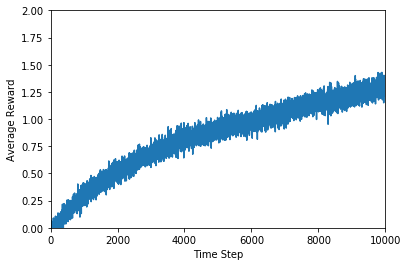

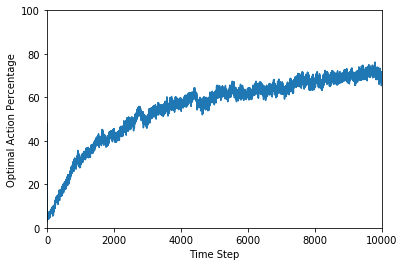

In [41]:
ques_1_constant_size()

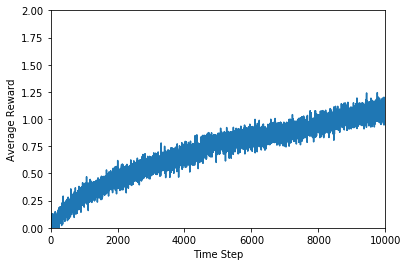

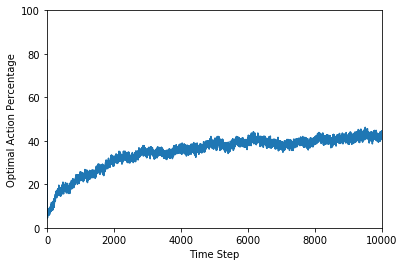

In [42]:
ques_1_sample_average()

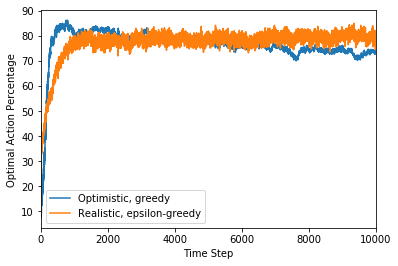

In [44]:
ques_2_non_stationary()

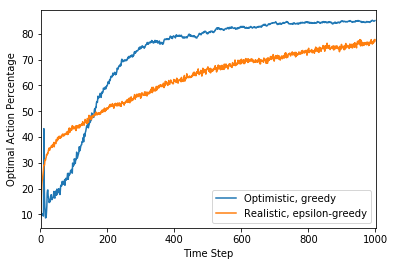

In [36]:
ques_2_stationary()

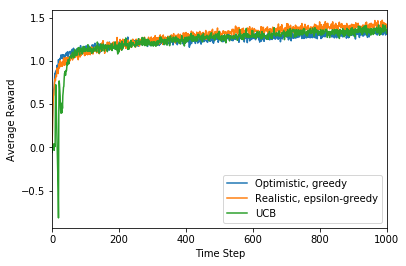

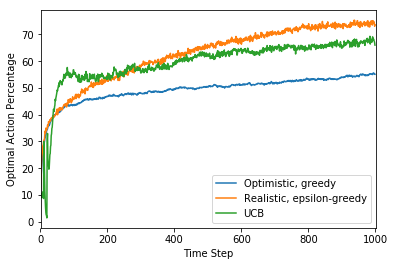

In [28]:
ques_4_non_stationary()

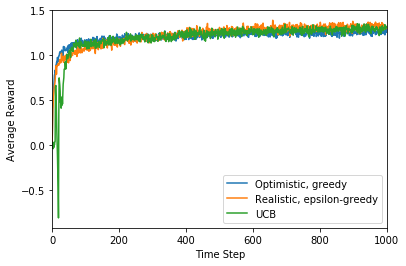

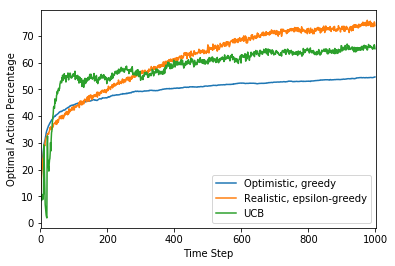

In [40]:
ques_4_stationary()